In [6]:
import extremefill2D

In [38]:
from toolz.curried import iterate, take_nth, pipe, nth

In [39]:
aa = lambda a: a * 2

In [40]:
out = pipe(1, iterate(aa), nth(4))

In [42]:
out

16

In [6]:
aa(3)

4

In [7]:
?iterate

In [ ]:
iterate(a)

In [6]:
from extremefill2D.fextreme import init_sim, restart_sim, iterate_sim
from extremefill2D.fextreme.plot import vega_plot
import vega
from extremefill2D.fextreme.tools import get_by_uuid

In [2]:
treant = init_sim('scripts/params.json', 'data', tags=['debug'])

In [3]:
print(treant.uuid)

567e64e0-6d27-47a5-ba98-d5ce533a15f0


In [4]:
treant = iterate_sim(treant, 3, 100)

In [5]:
treant.leaves

<View([<Leaf: 'data/567e64e0-6d27-47a5-ba98-d5ce533a15f0/Treant.567e64e0-6d27-47a5-ba98-d5ce533a15f0.json'>, <Leaf: 'data/567e64e0-6d27-47a5-ba98-d5ce533a15f0/data0000000.nc'>, <Leaf: 'data/567e64e0-6d27-47a5-ba98-d5ce533a15f0/data0000100.nc'>, <Leaf: 'data/567e64e0-6d27-47a5-ba98-d5ce533a15f0/data0000200.nc'>, <Leaf: 'data/567e64e0-6d27-47a5-ba98-d5ce533a15f0/data0000300.nc'>, <Leaf: 'data/567e64e0-6d27-47a5-ba98-d5ce533a15f0/params.json'>])>

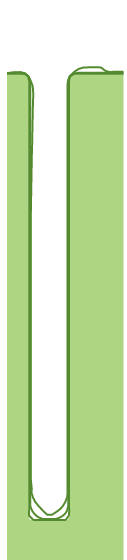

In [7]:
vega_plot(treant)

In [8]:
 treant1 = iterate_sim(treant, 1, 300)